# getting to know our data

In [1]:
#importing the libs that we'll be needing.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


#data set that contains 130k wine reviews, obtained in Kaggle (https://www.kaggle.com/zynicide/wine-reviews)
df = pd.read_csv('wine.csv')

df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [2]:
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df.head(2)

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [3]:
#getting to know our df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
#checking the amount of null values
df.isna().sum()

index                        0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

### assumptions: 
1.'points' is the result of the review;

2.'price' is the cost of each bottle;

3.'country', 'province' and 'regions' are the places where the wines came from.

# exploratory analysis

In [5]:
df.describe()

,index,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
#tasters that did the most reviews?
df['taster_name'].value_counts().sort_values(ascending=False).head(10)

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Name: taster_name, dtype: int64

In [7]:
#on average, who gives the most "harsh" reviews? (lowest points)
#let's check the avg points and how many reviews they've given

df.groupby('taster_name').agg({'points':'mean', 'index':'count'}).sort_values('points').head(10)

,points,index
taster_name,,
Alexander Peartree,85.855422,415
Carrie Dykes,86.395683,139
Susan Kostrzewa,86.609217,1085
Fiona Adams,86.888889,27
Michael Schachner,86.907493,15134
Lauren Buzzeo,87.739510,1835
Christina Pickard,87.833333,6
Jeff Jenssen,88.319756,491
Anna Lee C. Iijima,88.415629,4415


In [8]:
#what if we apply the same logic to the wines? which wines are the lowest ranked?
df.groupby('title').agg({'points':'mean', 'index':'count'}).sort_values('points').head(10)

,points,index
title,,
Viniverde 2011 Estreia Rosé (Vinho Verde),80.0,1
T 2015 Toro,80.0,1
Männle 2012 Reserva Carmenère (Itata Valley),80.0,1
Ca' Momi 2007 Rosso Di California Red (California),80.0,1
Männle 2012 Chardonnay (Itata Valley),80.0,1
Château de Pennautier 2001 Cabernet Sauvignon (Vin de Pays d'Oc),80.0,1
Viejo Isaias 2013 Malbec Rosé (Mendoza),80.0,1
Muscardini 2009 Gracie Creek Vineyards Syrah (Sonoma Valley),80.0,1
Mureda 2014 Organic Sauvignon Blanc (Vino de la Tierra de Castilla),80.0,1


In [9]:
#let's check the top 10 best ranked wines
df.groupby('title').agg({'points':'mean', 'index':'count'}).sort_values('points', ascending=False).head(10)

,points,index
title,,
Château Lafite Rothschild 2010 Pauillac,100.0,1
Verité 2007 La Muse Red (Sonoma County),100.0,1
Casa Ferreirinha 2008 Barca-Velha Red (Douro),100.0,1
Tenuta dell'Ornellaia 2007 Masseto Merlot (Toscana),100.0,1
Louis Roederer 2008 Cristal Vintage Brut (Champagne),100.0,1
Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),100.0,1
Biondi Santi 2010 Riserva (Brunello di Montalcino),100.0,1
Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),100.0,1
Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),100.0,1


In [10]:
#how often does each country appear in the dataset?
df['country'].value_counts().sort_values(ascending=False).head(10)

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

In [11]:
#provinces that had the most wines reviewed
df['province'].value_counts().sort_values(ascending=False).head(10)

California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
Burgundy             3980
Northern Spain       3851
Piedmont             3729
Mendoza Province     3264
Veneto               2716
Name: province, dtype: int64

In [12]:
#on average, which provinces produces the top ranked wines?
df.groupby('province').agg({'points':'mean'}).sort_values('points', ascending=False).head()

,points
province,
Südburgenland,94.000000
Madeira,93.230769
Mittelrhein,92.000000
Puente Alto,91.733333
Wachau,91.620397


Text(0.5, 1.0, 'Top 10 Provinces - Average Price')

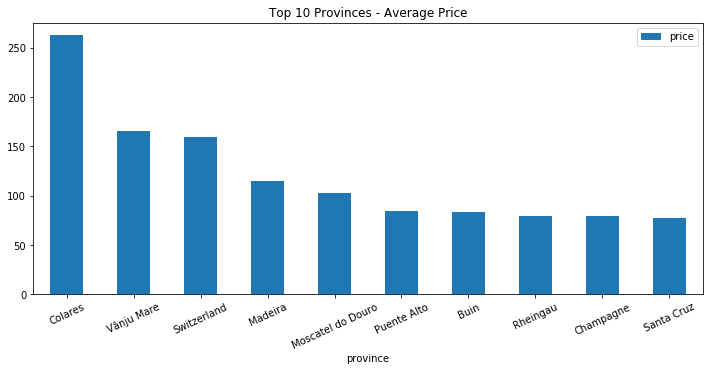

In [13]:
#what about the most expensive wines?
df.groupby('province').agg({'price':'mean'}).sort_values('price', ascending=False).head(10).plot(kind='bar', rot=25, figsize=[12,5]).set_title('Top 10 Provinces - Average Price')

In [14]:
#provinces and region combo that had the most wines reviewed
provinces = df.groupby(['province','region_1']).agg({'index':'count'}).reset_index()
provinces.head()

,province,region_1,index
0,Alsace,Alsace,2163
1,Alsace,Crémant d'Alsace,277
2,Andalucia,Jerez,124
3,Andalucia,Manzanilla-Sanlúcar de Barrameda,5
4,Andalucia,Montilla-Moriles,18


In [15]:
provinces.sort_values('index', ascending=False).head(10)

,province,region_1,index
285,California,Napa Valley,4480
1210,Washington,Columbia Valley (WA),4124
311,California,Russian River Valley,3091
208,California,California,2629
300,California,Paso Robles,2350
772,Oregon,Willamette Valley,2301
645,Mendoza Province,Mendoza,2301
0,Alsace,Alsace,2163
473,Champagne,Champagne,1613
803,Piedmont,Barolo,1599


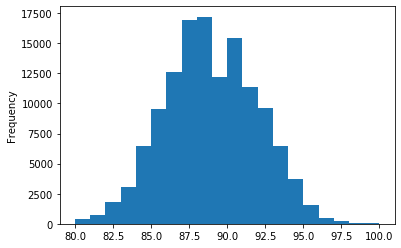

In [16]:
#understanding the points column
df['points'].plot(kind='hist', bins=20)

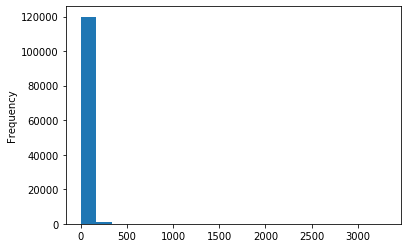

In [17]:
#understanding the price column
df['price'].plot(kind='hist', bins=20)

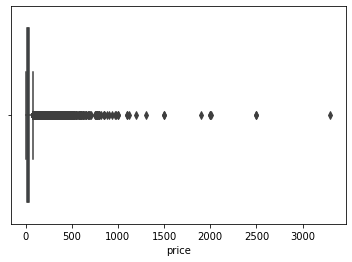

In [18]:
sns.boxplot(df['price'])

a lot of "outliers" in the price column. when we applied .describe(), we were also able to see that (std bigger than the mean, and a huge gap between 75% and max values)

In [19]:
#per price, what's the best rating it can get?

best_rating_per_price = df.groupby('price').apply(lambda df: df.points.max()).reset_index()
best_rating_per_price.head(10)

,price,0
0,4.0,86
1,5.0,87
2,6.0,88
3,7.0,91
4,8.0,91
5,9.0,91
6,10.0,91
7,11.0,92
8,12.0,93
9,13.0,94


we can already see that wines with low prices are able to obtain > 90 points

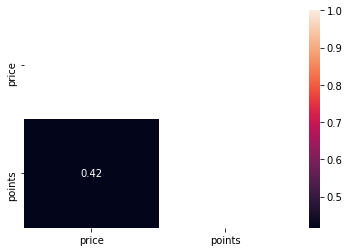

In [20]:
#does higher price mean a higher points review?
corr = df[['price','points']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask)

not that strong of a correlation

In [21]:
#let's explore our descriptions
df[['description']].head(10)

,description
0,"Aromas include tropical fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth..."
2,"Tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this..."
5,Blackberry and raspberry aromas show a typical...
6,"Here's a bright, informal red that opens with ..."
7,This dry and restrained wine offers spice in p...
8,Savory dried thyme notes accent sunnier flavor...
9,This has great depth of flavor with its fresh ...


In [22]:
#description values contain a lot of adjectives, let's check which ones appear the most?

tropical = df.description.map(lambda desc: "tropical" in desc).sum()
fruity = df.description.map(lambda desc: "fruity" in desc).sum()
dry = df.description.map(lambda desc: "dry" in desc).sum()
sweet = df.description.map(lambda desc: "sweet" in desc).sum()


description_counts = pd.Series([tropical, fruity, dry, sweet], index=['tropical', 'fruity','dry','sweet'])
description_counts

tropical     3607
fruity       9090
dry         17168
sweet       15133
dtype: int64